# Convolutional Neural Networks (ConvNets)

ConvNets are a specific type of architecture for dealing with images, being a strong arm for computer vision models. The main differences between a traditional neural network and a CNN are two types of layers: __convolutions__ and __pooling__.

<img src="https://miro.medium.com/max/3288/1*uAeANQIOQPqWZnnuH-VEyw.jpeg" width=600>

## Convolutions

As convoluções têm como objetivo destacar elementos nas imagens que forem relevantes utilizando da aplicação de filtros. A forma como o filtro funciona seria como uma transformação matemática entre matrizes:

<img src="https://miro.medium.com/max/658/0*jLoqqFsO-52KHTn9.gif" width=500>

Com esses filtros, consegue-se criar os chamados __features maps__ ou mapas de atributo, que seria novas imagens destaques em determinados pontos da imagem de acordo com os filtros a serem aplicados:

<img src="https://miro.medium.com/max/875/1*ixuhX9vaf1kUQTWicVYiyg.png" width=900>

## Pooling

A camada de _Pooling_ ou também chamada de Subamostragem, ajuda a selecionar os principais elementos de uma imagem garantindo que seja representativo da imagem de origem. Então determinada uma janela de aplicação da subamostragem, o modelo percorre toda imagem aplicando algum tipo de agregação, como por exemplo média, máximo ou mesmo soma:

<img src="https://miro.medium.com/max/2340/1*Fw-ehcNBR9byHtho-Rxbtw.gif" width=600>

<img src="https://www.bouvet.no/bouvet-deler/understanding-convolutional-neural-networks-part-1/_/attachment/inline/e60e56a6-8bcd-4b61-880d-7c621e2cb1d5:6595a68471ed37621734130ca2cb7997a1502a2b/Pooling.gif" width=600>

A Aplicação do _Pooling_ auxilia na rede no sentido de manter determinados pontos relevantes da imagem, mas auxilia ao mesmo tempo a generalizar para as demais imagens.

<img src = "https://www.bouvet.no/bouvet-deler/understanding-convolutional-neural-networks-part-2/_/attachment/inline/607c9f97-d102-4025-9d6d-4149831f1bc2:7486b2c8566539842998faeec3cd28d2d0aa5360/Screenshot%202019-07-01%20at%2019.43.59.png" width=800>


Notem que fazer esses processos envolvem sempre redução do tamanho ou da qualidade da imagem, mas podemos evitar esse tipo de efeito utilizando de duas técnicas auxiliares que são o __zero-padding__ e o __stride__

<br><br>

- _Zero-Padding_: Consiste em adicionar uma camada de zeros ao redor da imagem com o intuito de preservar o tamanho da imagem antes da convoluções ou subamostragem e sem acrescentar viés a transformação:

<img src = "https://deeplizard.com/assets/jpg/2b25a0c1.jpg" width=800>

- _Stride_: Consiste em determinar "saltos" durante a aplicação das janelas de filtros, sendo esses saltos tanto na vertical quanto na horizontal:

<img src = "https://miro.medium.com/max/1400/1*4wZt9G7W7CchZO-5rVxl5g@2x.gif" width=600>

## 

##  Exemplo - Fashion MNIST

Vamos revisitar o exercício do MNIST utilizando agora de uma CNN para avaliar as imagens:

In [1]:
# TensorFlow e tf.keras
import tensorflow
import keras

# Bibliotecas Auxiliares
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Baixando a nossa base de dados

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 
               'Trouser', 
               'Pullover', 
               'Dress', 
               'Coat',
               'Sandal', 
               'Shirt', 
               'Sneaker', 
               'Bag', 
               'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## Pré-Processamento dos Dados

In [9]:
# Reshape

#Faça o reshape da train_images dividindo por 255. e salvando na mesma variavel
train_images = train_images / 255.0

#Faça o reshape da test_images dividindo por 255. e salvando na mesma variavel
test_images = test_images / 255.0

In [10]:
cnn = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [11]:
# Crie um compile() com os seguintes parametros:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Crie o summary() para o modelo
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [12]:
# Faça o fit do modelo passando train_images, train_labels e epochs = 10
cnn.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3907 - accuracy: 0.8619
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2637 - accuracy: 0.9050
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2228 - accuracy: 0.9178
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1894 - accuracy: 0.9306
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1636 - accuracy: 0.9395


In [13]:
# crie o pred_labels usando a função predict_classes para o test_images
pred_labels_cnn = np.argmax(cnn.predict(test_images), axis = -1)
pred_labels_cnn

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [16]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

# Faça o print do classification_report para pred_labels e test_labels
print(classification_report(pred_labels_cnn, test_labels))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       917
           1       0.99      0.99      0.99       996
           2       0.79      0.91      0.85       867
           3       0.95      0.87      0.91      1093
           4       0.87      0.83      0.85      1052
           5       0.98      0.99      0.98       992
           6       0.79      0.74      0.76      1067
           7       0.96      0.96      0.96      1004
           8       0.98      0.98      0.98      1006
           9       0.97      0.96      0.97      1006

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



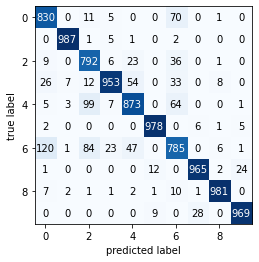

In [17]:
# Crie a matriz de confusão para o pred_labels e test_labels
cm = confusion_matrix(pred_labels_cnn, test_labels)
plot_confusion_matrix(conf_mat=cm)
plt.show()

## 

## Exercícios

__1)__ Desenvolva uma rede CNN para a base MNIST de classificação de dígitos, seguindo os passos abaixo:
- Carregue os dados segundo a função dada em aula, utilize os dados de teste como dados em __produção__, ou seja iremos usar em um outro momento;
- Nomeie os dados de treino como X e faça as seguintes separações: X em treino e teste (90/10%) e depois o X de treino em treino e validação (80/20%);
- Monte uma CNN;
- Faça as predições, avalie overfitting e salve o modelo final e os dados de produção;
- Carregue o modelo treinado e os dados de produção, e faça as novas predições.